Monte Carlo Sampling

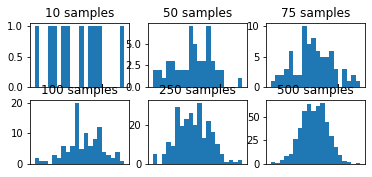

In [134]:
#taken from Jason Brownlee's site
# example of effect of size on monte carlo sample
from numpy.random import normal
import matplotlib.pyplot as plt

#define variables
mu = 50
sigma = 5

# generate monte carlo samples of differing size
sizes = [10, 50, 75, 100, 250, 500]

for i in range(len(sizes)):
	# generate sample
	sample = normal(mu, sigma, sizes[i])
	# plot histogram of sample
	plt.subplot(3, 3, i+1)
	plt.hist(sample, bins=20)
	plt.title('%d samples' % sizes[i])
	plt.xticks([])
# show the plot
plt.show()

Monte Carlo with RBF Kernal

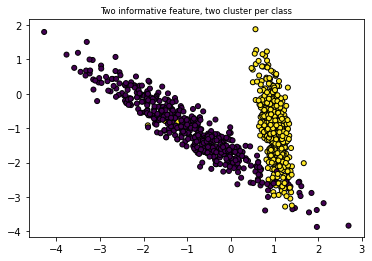

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import seed
from random import randint
seed(1)
random_num = randint(0,100)

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes = 2, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, random_state=random_num)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [136]:
df

,x,y,label
0,0.174625,-1.563645,0
1,-0.764278,-1.713633,0
2,0.804706,-0.649325,1
3,0.835076,-1.218568,1
4,-0.164218,-1.373664,0
...,...,...,...
995,0.882936,0.457477,1
996,-1.795450,-0.230318,0
997,0.106070,-1.934255,0
998,0.459180,-2.088665,0


In [137]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

X = (X - X.min()) / (X.max() - X.min())
X

,x,y
0,0.638630,0.401164
1,0.504079,0.375081
2,0.728924,0.560168
3,0.733276,0.461175
4,0.590071,0.434203
...,...,...
995,0.740135,0.752645
996,0.356305,0.633035
997,0.628805,0.336714
998,0.679408,0.309862


In [138]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma=1, random_state=1)
X = rbf_feature.fit_transform(X)

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 100), (900,), (100, 100), (100,))

In [140]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=3000, tol=1e-3, random_state=1).fit(X_train, y_train)
model.score(X_train, y_train)

0.8877777777777778

In [141]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.84


In [142]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print("")
print(classification_report(y_val, y_pred))

[[47  0]
 [16 37]]

              precision    recall  f1-score   support

           0       0.75      1.00      0.85        47
           1       1.00      0.70      0.82        53

    accuracy                           0.84       100
   macro avg       0.87      0.85      0.84       100
weighted avg       0.88      0.84      0.84       100



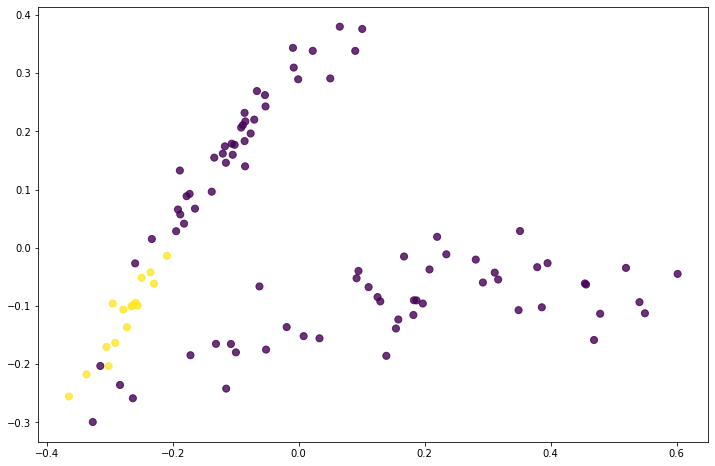

In [143]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)

Monte Carlo with Python

In [144]:
# see:- https://pbpython.com/monte-carlo.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')

avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [145]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [146]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales','Commission_Amount','Sales_Target'])

results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,572,107.25","2,853,098.088","83,583,975.0"
std,"2,692,268.7751630195","102,595.495014028","2,650,681.7402440193"
min,"75,119,250.0","2,505,888.0","75,025,000.0"
25%,"81,713,250.0","2,781,032.5","81,768,750.0"
50%,"83,555,125.0","2,853,120.0","83,475,000.0"
75%,"85,389,625.0","2,920,543.75","85,331,250.0"
max,"92,367,500.0","3,187,162.0","92,150,000.0"


In [147]:
print(results_df)

          Sales  Commission_Amount  Sales_Target
0    83678250.0          2867972.0      83475000
1    80424500.0          2803448.0      79800000
2    83860500.0          2862872.0      83875000
3    78878250.0          2695875.0      79175000
4    85991000.0          2976658.0      85900000
..          ...                ...           ...
995  83180500.0          2792892.0      83550000
996  85172250.0          2887478.0      85400000
997  83377750.0          2870962.0      83300000
998  83947000.0          2831775.0      84275000
999  82081500.0          2811950.0      82225000

[1000 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


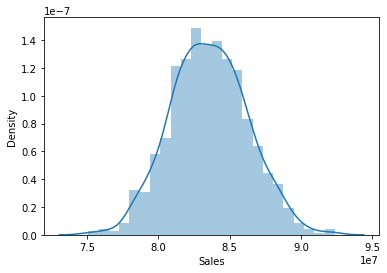

In [148]:
sns.distplot(results_df.Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


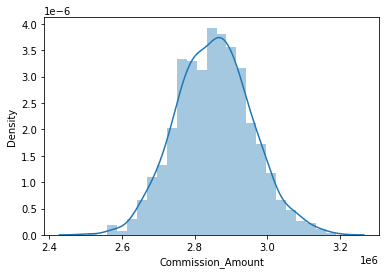

In [149]:
sns.distplot(results_df.Commission_Amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


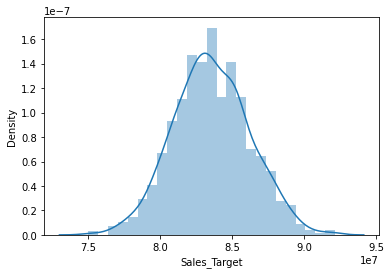

In [150]:
sns.distplot(results_df.Sales_Target)

Monte Carlo with SkewedChi2Sampler

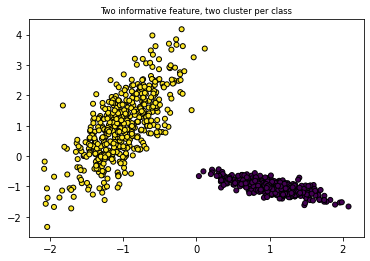

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import seed
from random import randint
seed(2)
random_num = randint(0,100)

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes = 2, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, random_state=random_num)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

plt.title("Two informative feature, two cluster per class", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [152]:
df

,x,y,label
0,0.556757,-0.908909,0
1,0.032868,-0.661958,0
2,-0.815784,1.119149,1
3,1.349261,-1.072139,0
4,-1.405695,0.274439,1
...,...,...,...
995,0.673070,-0.899829,0
996,0.528484,-0.891292,0
997,-0.919071,1.824438,1
998,1.113386,-0.982430,0


In [153]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

y = target
X = df

X = (X - X.min()) / (X.max() - X.min())
X

,x,y
0,0.634212,0.219058
1,0.508301,0.256975
2,0.304338,0.530453
3,0.824681,0.193995
4,0.162560,0.400753
...,...,...
995,0.662166,0.220452
996,0.627417,0.221762
997,0.279514,0.638745
998,0.767991,0.207769


In [154]:
from sklearn.kernel_approximation import SkewedChi2Sampler

chi2_feature = SkewedChi2Sampler(skewedness=.01,n_components=10,random_state=0)
X = chi2_feature.fit_transform(X)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 10), (900,), (100, 10), (100,))

In [156]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(500,),random_state=2, max_iter=1000).fit(X_train, y_train)
model.score(X_train, y_train)

0.9988888888888889

In [157]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

1.0


In [158]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print("")
print(classification_report(y_val, y_pred))

[[50  0]
 [ 0 50]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



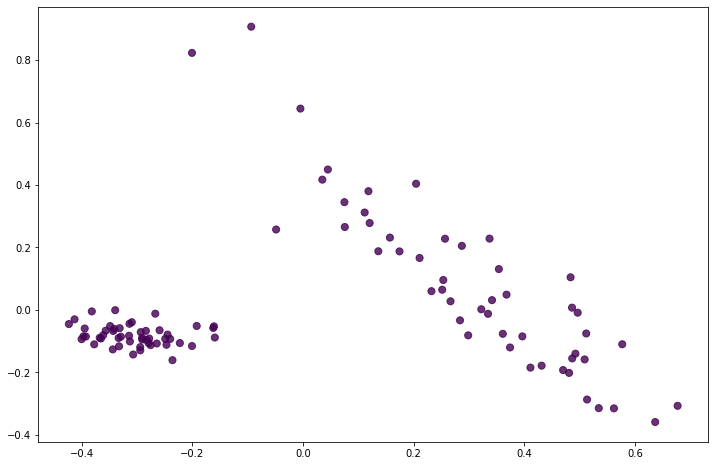

In [159]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)